# Assignment 1

run ```bash setup.sh``` in the terminal first 

In [14]:
# We need to include the home directory in our path, so we can read in our own module.
import os
import sys
sys.path.append(os.path.join(".."))
import cv2
import numpy as np
import pandas as pd
from utils.imutils import jimshow
from utils.imutils import jimshow_channel
import matplotlib.pyplot as plt

In [7]:
# load in an image 
rando_flower = os.path.join("..", "data", "flowers", "image_0244.jpg")

In [8]:
image = cv2.imread(rando_flower)

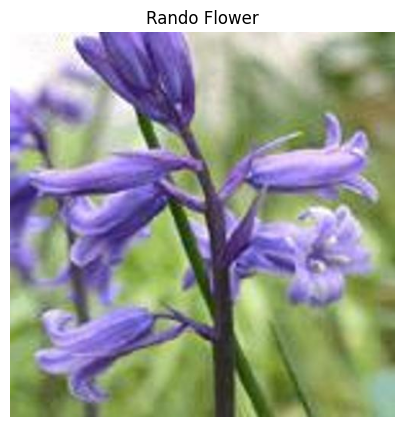

In [9]:
jimshow(image, "Rando Flower")

In [5]:
def plot_histogram(filename):
    # set data path
    input_path = os.path.join("..", "data", "flowers", filename)
    #load image
    image = cv2.imread(input_path)
    #split channels
    channels = cv2.split(image)
    # names of colours
    colors = ("b", "g", "r")
    # create plot
    plt.figure()
    # add title
    plt.title("Histogram")
    # Add xlabel
    plt.xlabel("Bins")
    # Add ylabel
    plt.ylabel("# of Pixels")

    # for every tuple of channel, colour
    for (channel, color) in zip(channels, colors):
        # Create a histogram - across all three channels
        hist = cv2.calcHist([channel], [0], None, [256], [0, 256])
        # Plot histogram
        plt.plot(hist, color=color)
        # Set limits of x-axis
        plt.xlim([0, 256])



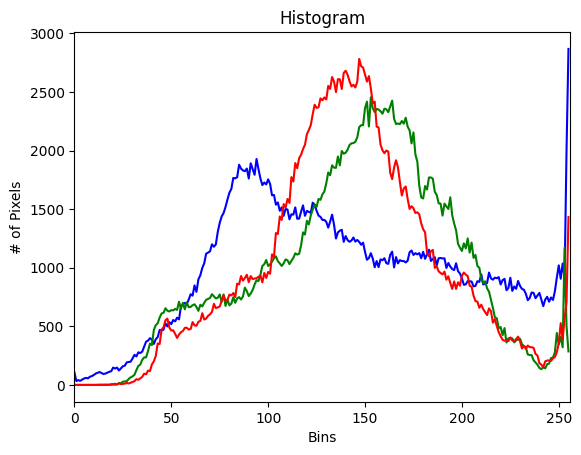

In [6]:
# using the plot_histogram function to show color histogram of my randomly selected flower image 
plot_histogram("image_0244.jpg")

In [29]:
# function to create histogram for an image and normalizes it so it's ready for comparison
def compare_hist (image_path):
    image = cv2.imread(image_path)
    # Create a histogram - across all three channels
    hist = cv2.calcHist([image], [0, 1, 2], None, [256, 256, 256], [0, 256, 0, 256, 0, 256])
    # normalzing the histogram
    hist = cv2.normalize(hist, hist, 0, 1.0, cv2.NORM_MINMAX)
    return hist

In [30]:
path = os.path.join("..", "data", "flowers")
image_dir = os.listdir(path)

# removing the image I selected to compare with 
image_dir.remove("image_0244.jpg")

# using the function above for my selected flower 
hist_rflower = compare_hist(rando_flower)

# making a large empty dataframe with the columns specified  
df = pd.DataFrame(columns=["Filename", "Distance"])

# for loop to go through all the other images 
for filename in image_dir:
     image_path = os.path.join("..", "data", "flowers", filename)
     # using the compare hist function 
     hist = compare_hist(image_path)
     # comparing histograms
     dist = round(cv2.compareHist(hist_rflower, hist, cv2.HISTCMP_CHISQR), 2)
     # creating a new object with the variables 
     new_dat = (filename, dist)
     # creating pandas df 
     file_df = pd.DataFrame([new_dat], columns=["Filename", "Distance"])
     # concatenating the empty df with the file_df data frame
     df = pd.concat([df, file_df], ignore_index=True)
# selecting the 5 most similiar images with the shortest distance to my random flower 
df = df.sort_values('Distance', ascending=True).head(5)
# creating an outpath 
outpath = os.path.join("..", "out", "most_similar_flowers.csv")
df.to_csv(outpath)
